# Lineære Systemer av Differensialligninger (MIP 11.1)

In [1]:
try:
    import python_linear_algebra
except:
    !pip install python_linear_algebra@git+https://github.com/mbr085/python_linear_algebra
    import python_linear_algebra
    

In [2]:
import numpy as np
from python_linear_algebra.matrix_reduction import skriv_ut_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import skriv_ut_numpy_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import finn_egenvektorer_og_egenverdier
from python_linear_algebra.matrix_reduction import gauss_jordan
from python_linear_algebra.matrix_reduction import invers_matrise
import matplotlib.pyplot as plt

Et eksempel på **et system av lineære differensialligninger i kjemi** oppstår i **laserkjemi**, spesielt i samspillet mellom molekyler og lys. Et kjent tilfelle er **vibrasjons- eller elektronisk populasjonsdynamikk i eksiterte tilstander**.  

---

### [**Eksempel: System av lineære differensialligninger i laserindusert fluorescens (LIF)**](Kontinuerlig_LIF.ipynb)  

## Oppgave

La $A$ være en 2 x 2 matrise med egenverdier $\lambda_1$ og $\lambda_2$ og egenvektorer $\vec w_1$ og $\vec w_2$ med 
$A \cdot \vec w_1 = \lambda_1 \cdot \vec w_1$ og $A \cdot \vec w_2 = \lambda_2 \cdot \vec w_.$

La $x$ og $y$ være to tall og la $\vec v(t) = x\cdot e^{\lambda_1 t} \cdot \vec w_1 + y \cdot e^{\lambda_2 t} \cdot \vec w_2$. Sjekk at $\vec v(t)$ er en løsning til $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$ med
$\vec v(0) = x \cdot \vec w_1 + y \cdot \vec w_2$.

## Oppgave

La 
$A=\begin{bmatrix}-1 & 2\\-3 &4\end{bmatrix}$ og la $\vec v_0 = \begin{bmatrix}1\\0\end{bmatrix}$. Finn en løsning til differensialligningssystemet $\frac{d}{dt} \vec v(t) 
= A \cdot \vec v(t)$ med $\vec v(0) = \vec v_0$ ved at følge stegene under.

1. Finn egenverdier $\lambda_1$ og $\lambda_2$ for $A$ og egenvektorer $\vec w_1$ og $\vec w_2$ med $A \cdot \vec w_1 = \lambda_1 \cdot \vec w_1$ og $A \cdot \vec w_2 = \lambda_2 \cdot \vec w_2.$
2. Finn tall $x$ og $y$ slik at $\vec v_0 = x \cdot \vec w_1 + y \cdot \vec w_2$.
3. Sjekk at $\vec v(t) = x\cdot e^{\lambda_1 t} \cdot \vec w_1 + y \cdot e^{\lambda_2 t} \cdot \vec w_2$ er en løsning til $\frac{d}{dt} \vec v(t) = A \cdot \vec v(t)$ med
$\vec v(0) = \vec v_0$.


Vi lager en funksjon som løser homogene systemer av differensialligninger for oss:

In [294]:
def løs_homogent_system_av_differensialligninger(overgangsmatrise, starttilstand, tverdier):
    '''
    Løser et homogent lineært system av differensialligninger analytisk
    
    Parametre:
        overgangsmatrise (np.ndarray): En kvadratisk Numpy-array med koeffisientene for systemet
        starttilstand (np.ndarray): En 1D Numpy-array av samme lengde som overgangsmatrise
        tverdier (np.ndarray): En 1D Numpy-array med verdier av t der løsningen skal beregnes
    
    Retunerer:
        y (np.ndarray): Verdiene av løsningen til sistemet i de angitte tverdier
    '''
    egenvektorer_og_egenverdier = finn_egenvektorer_og_egenverdier(overgangsmatrise)
    egenverdier = np.array([x[0] for x in egenvektorer_og_egenverdier])
    P = np.hstack([x[2][0] for x in egenvektorer_og_egenverdier])
    return P @ (np.diagflat((invers_matrise(P) @ starttilstand[:, None])) @ np.exp(egenverdier[:, None] @ tverdier[None, :]))

## Komplekse egenverdier

Hvis det karakteristiske polynomet til overgangsmatrisen $A$ ikke har like mange reelle røtter som graden av polynomet kan det være fordi det finnes komplekse røtter. For eksempel har polynomet $t^2 + 1$ av grad $2$ ingen reelle røtter. Det har derimot de to komplekse røtterne $\pm i$. Det vil si at $i^2 = (-i)^2 = -1$. Python kan regne med komplekse tall. Tallet $i$ skrives `1j`.

In [18]:
i = 1j
i * i

(-1+0j)

Hvis vi vil bruke `i * i` som et vanlig reelt tall kan vi bytte det ut med den reelle delen av tallet:

In [19]:
(i * i).real

-1.0

### Hvis det karakteristiske polynomet til overgangsmatrisen $A$ ikke har like mange **komplekse** røtter som graden av polynomet kan differensialligningssystemet $\frac{d}{dt} \vec v(t) 
= A \cdot \vec v(t)$ med $\vec v(0) = \vec v_0$ løses ved å gjøre alle utregninger med komplekse tall.

Hvis vi ber python om å regne med komplekse tall kan koden over brukes i dette tilfellet. 

## Dempet svingning i fjær

Et eksempel på et homogent system av lineære differensialligninger kommer fra et lodd hengt opp i en fjær.

Overgangsmatrisen for dette systemet er på formen:

$$A = \begin{bmatrix}0&1\\-a&-b\end{bmatrix}$$

der $a > 0$ og $b \ge 0$.

### Oppgave

Sjekk at det karakteristiske polynomet til matrisen $A$ er
$$t^2 + b t + a$$

---

Røttene til dette polynomet er 
$$\frac{-b \pm \sqrt{b^2 - 4a}}{2}$$

Når $b^2 - 4a < 0$ finnes ingen reelle røtter. Derimot finnes to komplekse røtter.

La oss se hva som skjer når $a = 1$ og $b = 1$.

In [20]:
A = np.array([
    [0, 1],
    [-1, -1]
])

In [21]:
starttilstand = np.array([1, 0])
tverdier = np.linspace(0, 10, 100)

Hvis jeg kjører linjen under
```python
v = løs_homogent_system_av_differensialligninger(overgangsmatrise=A, starttilstand=starttilstand, tverdier=tverdier)
```
skjer dette:

```python
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[38], line 1
----> 1 v = løs_homogent_system_av_differensialligninger(overgangsmatrise=A, starttilstand=starttilstand, tverdier=tverdier)

Cell In[12], line 15, in løs_homogent_system_av_differensialligninger(overgangsmatrise, starttilstand, tverdier)
     13 egenvektorer_og_egenverdier = finn_egenvektorer_og_egenverdier(overgangsmatrise)
     14 egenverdier = np.array([[x[0]] for x in egenvektorer_og_egenverdier])
---> 15 P = np.hstack([x[2][0] for x in egenvektorer_og_egenverdier])
     16 return P @ ((invers_matrise(P) @ starttilstand[:, None]) * np.exp(tverdier[None, :] * egenverdier))

File /nix/store/5i9070wfxw0mfnxilzvx7imlbkz30p69-python3.12-numpy-2.3.5/lib/python3.12/site-packages/numpy/_core/shape_base.py:367, in hstack(tup, dtype, casting)
    365     return _nx.concatenate(arrs, 0, dtype=dtype, casting=casting)
    366 else:
--> 367     return _nx.concatenate(arrs, 1, dtype=dtype, casting=casting)

ValueError: need at least one array to concatenate
```

**Æsj, dette var ikke bra!**

Problemet er at vi ikke regner ut komplekse egenverdier og egenvektorene dertil når overgangsmatrisen $A$ består av reelle tall.

En **løsning** på dette er å si til python at tallene i overgangsmatrisen skal oppfattes som komplekse tall:

In [22]:
A = np.array([
    [0, 1],
    [-1, -1]
]).astype(np.complex128)

In [23]:
v = løs_homogent_system_av_differensialligninger(overgangsmatrise=A, starttilstand=starttilstand, tverdier=tverdier)

Text(0.5, 1.0, 'Svingning i fjær')

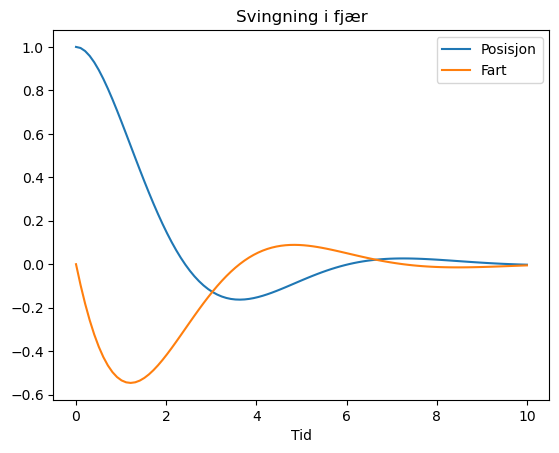

In [24]:
plt.plot(tverdier, v.real[0, :])
plt.plot(tverdier, v.real[1, :])
plt.xlabel('Tid')
plt.legend(['Posisjon', 'Fart'])
plt.title('Svingning i fjær')

La oss også se hva som skjer når $a = 1$ og $b = 0$:

In [25]:
A = np.array([
    [0, 1],
    [-1, 0]
]).astype(np.complex128)

In [26]:
v = løs_homogent_system_av_differensialligninger(overgangsmatrise=A, starttilstand=starttilstand, tverdier=tverdier)

Text(0.5, 1.0, 'Svingning i fjær')

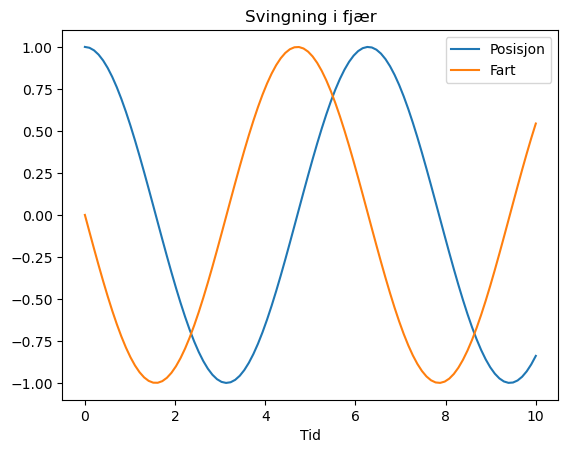

In [27]:
plt.plot(tverdier, v.real[0, :])
plt.plot(tverdier, v.real[1, :])
plt.xlabel('Tid')
plt.legend(['Posisjon', 'Fart'])
plt.title('Svingning i fjær')

**Advarsel** Hvis det karakteristiske polynomet er på formen $\det(A - tI) = (a_1 - t) \cdot (a_1 - t) \cdots (a_n - t)$ da må røttene $a_1, \dotsm a_n$ alle være forskjellige. Ellers feiler metoden vår. Det er mulig analytisk å løse tilfellet der røttene ikke alle er forskjellige, men det er litt knotet, så vi lar det ligge. 